In [26]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
df = pd.read_csv('Exp1.csv')

df_copy = df.copy()
df_copy.drop(['Run_ID', 'Experiment', 'Replica', 'Tool_ID', 'Group', 'Subgroup',
           'Condition', 'TCond',
           'Machined_length', 'Init_diameter', 'Final_diameter', 'CTime', 'R_measurement','Rsk','Rku','RSm','Rt','Fx','Fy','Fz','F','Rz'],axis=1, inplace=True)
print(df_copy.head())
print(df_copy.tail())

  Position    ap   vc  feed     Ra
0        a  0.25  350  0.07  0.391
1        a  0.25  350  0.07  0.359
2        a  0.25  350  0.07  0.421
3        a  0.25  350  0.07  0.450
4        a  0.25  350  0.07  0.360
    Position   ap   vc  feed     Ra
319        i  0.8  390   0.1  0.597
320        i  0.8  390   0.1  0.610
321        i  0.8  390   0.1  0.569
322        i  0.8  390   0.1  0.592
323        i  0.8  390   0.1  0.579


In [4]:
# Filtrowanie danych
filtered_df = df_copy[    (df_copy["Position"] == "a") &
    (df_copy["ap"] == 0.25) &
    (df_copy["vc"] == 350) &
    (df_copy["feed"] == 0.07)]

# pd wysweitla wszystko
pd.set_option('display.max_rows', None)

print(filtered_df)

  Position    ap   vc  feed     Ra
0        a  0.25  350  0.07  0.391
1        a  0.25  350  0.07  0.359
2        a  0.25  350  0.07  0.421
3        a  0.25  350  0.07  0.450
4        a  0.25  350  0.07  0.360
5        a  0.25  350  0.07  0.383


In [5]:
# Grupowanie po parametrach i uśrednianie Ra
aggregated_df = df_copy.groupby(["Position", "ap", "vc", "feed"], as_index=False)["Ra"].mean()

print(aggregated_df)

   Position    ap   vc  feed        Ra
0         a  0.25  350  0.07  0.394000
1         a  0.25  350  0.10  1.047833
2         a  0.50  310  0.10  0.907000
3         a  0.80  310  0.10  0.963000
4         a  0.80  350  0.07  0.377500
5         b  0.25  350  0.13  1.454583
6         b  0.50  310  0.07  0.269167
7         b  0.50  310  0.13  1.123833
8         b  0.80  310  0.07  0.652000
9         b  0.80  350  0.13  1.420500
10        c  0.25  350  0.07  0.633167
11        c  0.25  350  0.10  0.638500
12        c  0.50  310  0.07  0.449833
13        c  0.50  310  0.13  1.105167
14        c  0.80  310  0.13  0.928500
15        c  0.80  350  0.10  0.825833
16        d  0.25  390  0.10  0.717333
17        d  0.25  390  0.13  1.263833
18        d  0.50  310  0.10  0.517500
19        d  0.50  350  0.13  0.968000
20        d  0.80  350  0.07  0.569667
21        d  0.80  390  0.07  0.438667
22        e  0.25  390  0.10  0.931167
23        e  0.25  390  0.13  1.102833
24        e  0.50  350  0

In [6]:
# Filtrowanie danych 
filtered_df_2 = aggregated_df[
    (aggregated_df["ap"] == 0.25)]

# pd wyswietla wszystkie wiersze
pd.set_option('display.max_rows', None)

print(filtered_df_2)

   Position    ap   vc  feed        Ra
0         a  0.25  350  0.07  0.394000
1         a  0.25  350  0.10  1.047833
5         b  0.25  350  0.13  1.454583
10        c  0.25  350  0.07  0.633167
11        c  0.25  350  0.10  0.638500
16        d  0.25  390  0.10  0.717333
17        d  0.25  390  0.13  1.263833
22        e  0.25  390  0.10  0.931167
23        e  0.25  390  0.13  1.102833
28        f  0.25  390  0.07  0.395833
33        g  0.25  310  0.10  0.772250
38        h  0.25  310  0.07  0.233833
39        h  0.25  310  0.13  1.167000
44        i  0.25  310  0.07  0.391333
45        i  0.25  310  0.13  0.829833


In [7]:
label_encoder = LabelEncoder()

#label pozycji
aggregated_df['Position_encoded'] = label_encoder.fit_transform(aggregated_df['Position'])

print(aggregated_df)

   Position    ap   vc  feed        Ra  Position_encoded
0         a  0.25  350  0.07  0.394000                 0
1         a  0.25  350  0.10  1.047833                 0
2         a  0.50  310  0.10  0.907000                 0
3         a  0.80  310  0.10  0.963000                 0
4         a  0.80  350  0.07  0.377500                 0
5         b  0.25  350  0.13  1.454583                 1
6         b  0.50  310  0.07  0.269167                 1
7         b  0.50  310  0.13  1.123833                 1
8         b  0.80  310  0.07  0.652000                 1
9         b  0.80  350  0.13  1.420500                 1
10        c  0.25  350  0.07  0.633167                 2
11        c  0.25  350  0.10  0.638500                 2
12        c  0.50  310  0.07  0.449833                 2
13        c  0.50  310  0.13  1.105167                 2
14        c  0.80  310  0.13  0.928500                 2
15        c  0.80  350  0.10  0.825833                 2
16        d  0.25  390  0.10  0

In [8]:
scaler = StandardScaler()
features_to_scale = ['ap', 'vc', 'feed']
scaled_features = scaler.fit_transform(aggregated_df[features_to_scale])
scaled_df = pd.DataFrame(scaled_features, columns=[f'{col}_scaled' for col in features_to_scale])
print(scaled_df)

    ap_scaled  vc_scaled   feed_scaled
0   -1.274236   0.000000 -1.224745e+00
1   -1.274236   0.000000  5.665583e-16
2   -0.146006  -1.224745  5.665583e-16
3    1.207870  -1.224745  5.665583e-16
4    1.207870   0.000000 -1.224745e+00
5   -1.274236   0.000000  1.224745e+00
6   -0.146006  -1.224745 -1.224745e+00
7   -0.146006  -1.224745  1.224745e+00
8    1.207870  -1.224745 -1.224745e+00
9    1.207870   0.000000  1.224745e+00
10  -1.274236   0.000000 -1.224745e+00
11  -1.274236   0.000000  5.665583e-16
12  -0.146006  -1.224745 -1.224745e+00
13  -0.146006  -1.224745  1.224745e+00
14   1.207870  -1.224745  1.224745e+00
15   1.207870   0.000000  5.665583e-16
16  -1.274236   1.224745  5.665583e-16
17  -1.274236   1.224745  1.224745e+00
18  -0.146006  -1.224745  5.665583e-16
19  -0.146006   0.000000  1.224745e+00
20   1.207870   0.000000 -1.224745e+00
21   1.207870   1.224745 -1.224745e+00
22  -1.274236   1.224745  5.665583e-16
23  -1.274236   1.224745  1.224745e+00
24  -0.146006   0.000000 

In [10]:
final_df = pd.concat([scaled_df, aggregated_df.drop(columns=['ap', 'vc', 'feed','Position'])], axis=1)
print(final_df)

    ap_scaled  vc_scaled   feed_scaled        Ra  Position_encoded
0   -1.274236   0.000000 -1.224745e+00  0.394000                 0
1   -1.274236   0.000000  5.665583e-16  1.047833                 0
2   -0.146006  -1.224745  5.665583e-16  0.907000                 0
3    1.207870  -1.224745  5.665583e-16  0.963000                 0
4    1.207870   0.000000 -1.224745e+00  0.377500                 0
5   -1.274236   0.000000  1.224745e+00  1.454583                 1
6   -0.146006  -1.224745 -1.224745e+00  0.269167                 1
7   -0.146006  -1.224745  1.224745e+00  1.123833                 1
8    1.207870  -1.224745 -1.224745e+00  0.652000                 1
9    1.207870   0.000000  1.224745e+00  1.420500                 1
10  -1.274236   0.000000 -1.224745e+00  0.633167                 2
11  -1.274236   0.000000  5.665583e-16  0.638500                 2
12  -0.146006  -1.224745 -1.224745e+00  0.449833                 2
13  -0.146006  -1.224745  1.224745e+00  1.105167              

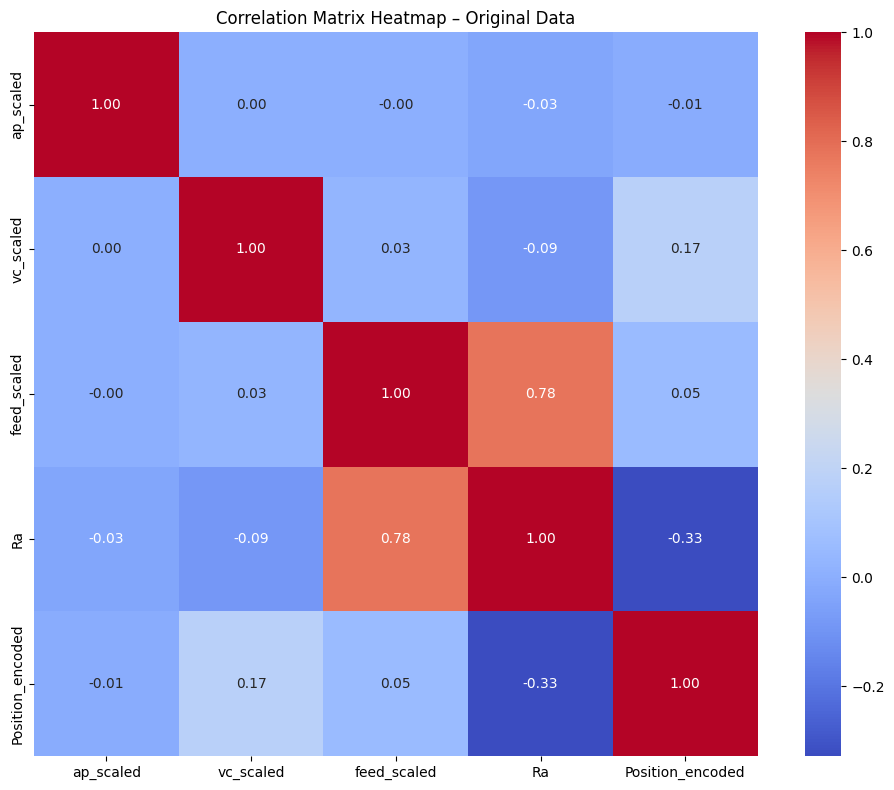

In [11]:
# correlation matrix on original (unscaled) data
corr_matrix_orig = final_df.corr()

# plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_orig, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix Heatmap – Original Data")
plt.tight_layout()
plt.show()


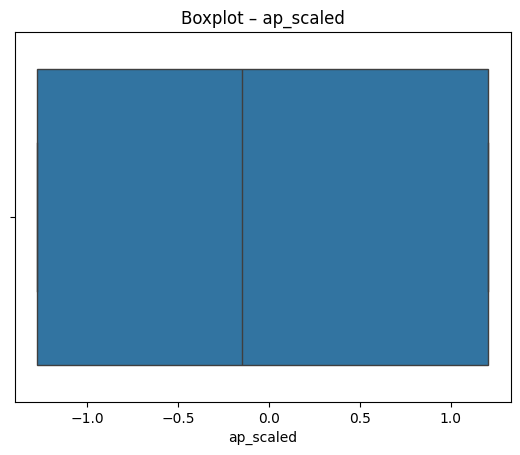

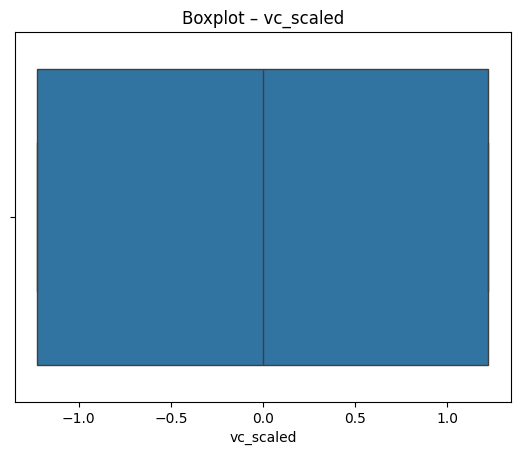

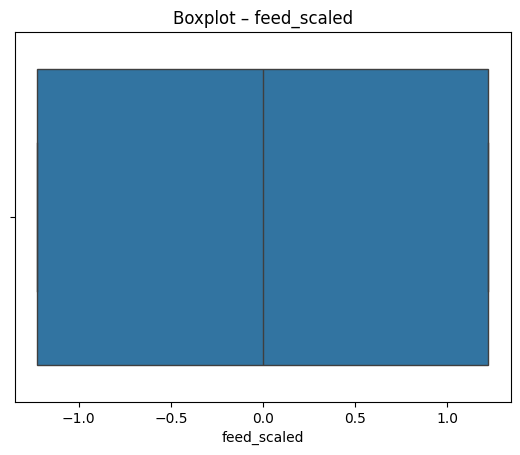

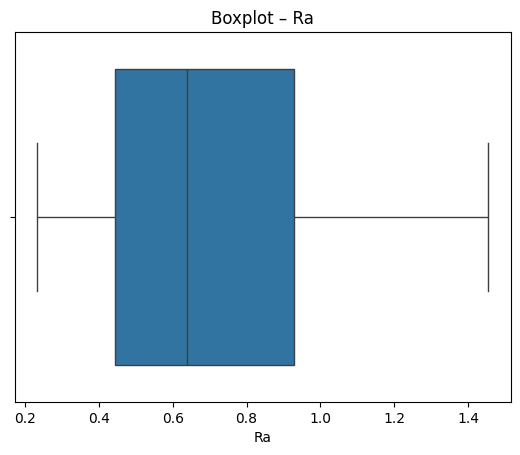

In [34]:
# wyszukiwanie outlierow
for col in ["ap_scaled", "vc_scaled", "feed_scaled", "Ra"]:
    sns.boxplot(x=final_df[col])
    plt.title(f"Boxplot – {col}")
    plt.show()

In [17]:
X_scaled = final_df[['ap_scaled','vc_scaled','feed_scaled','Position_encoded']]
y = final_df['Ra']
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(X_train)

    ap_scaled  vc_scaled   feed_scaled  Position_encoded
8    1.207870  -1.224745 -1.224745e+00                 1
49   1.207870   1.224745  5.665583e-16                 8
6   -0.146006  -1.224745 -1.224745e+00                 1
47  -0.146006   1.224745  1.224745e+00                 8
4    1.207870   0.000000 -1.224745e+00                 0
36   1.207870  -1.224745  1.224745e+00                 6
33  -1.274236  -1.224745  5.665583e-16                 6
19  -0.146006   0.000000  1.224745e+00                 3
48   1.207870  -1.224745  5.665583e-16                 8
15   1.207870   0.000000  5.665583e-16                 2
9    1.207870   0.000000  1.224745e+00                 1
16  -1.274236   1.224745  5.665583e-16                 3
26   1.207870   0.000000  1.224745e+00                 4
44  -1.274236  -1.224745 -1.224745e+00                 8
25  -0.146006   1.224745  5.665583e-16                 4
11  -1.274236   0.000000  5.665583e-16                 2
0   -1.274236   0.000000 -1.224

In [18]:
print(X_test)

    ap_scaled  vc_scaled   feed_scaled  Position_encoded
43   1.207870   1.224745  1.224745e+00                 7
40  -0.146006   0.000000  5.665583e-16                 7
46  -0.146006   0.000000  1.224745e+00                 8
12  -0.146006  -1.224745 -1.224745e+00                 2
24  -0.146006   0.000000  5.665583e-16                 4
31   1.207870   0.000000  5.665583e-16                 5
17  -1.274236   1.224745  1.224745e+00                 3
32   1.207870   1.224745  1.224745e+00                 5
3    1.207870  -1.224745  5.665583e-16                 0
30  -0.146006   1.224745 -1.224745e+00                 5
13  -0.146006  -1.224745  1.224745e+00                 2


In [19]:
print(y_train)

8     0.652000
49    0.580833
6     0.269167
47    0.667833
4     0.377500
36    1.077667
33    0.772250
19    0.968000
48    0.606667
15    0.825833
9     1.420500
16    0.717333
26    0.870500
44    0.391333
25    0.553500
11    0.638500
0     0.394000
45    0.829833
27    0.717167
34    0.273000
5     1.454583
29    0.391333
37    0.467500
1     1.047833
21    0.438667
2     0.907000
39    1.167000
35    0.516333
23    1.102833
41    0.398167
10    0.633167
22    0.931167
18    0.517500
50    0.311667
20    0.569667
7     1.123833
42    0.384667
14    0.928500
28    0.395833
38    0.233833
Name: Ra, dtype: float64


In [20]:
print(y_test)

43    0.835333
40    0.607500
46    0.540833
12    0.449833
24    0.623833
31    0.679500
17    1.263833
32    1.065667
3     0.963000
30    0.360167
13    1.105167
Name: Ra, dtype: float64


In [22]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

In [24]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [31]:
def evaluate_model(name, y_true, y_pred):
    print(f"\nWyniki dla: {name}")
    print("R² Score:", r2_score(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    # Wykres rzeczywistych vs. przewidywanych
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.7, edgecolors='k')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Rzeczywiste Ra')
    plt.ylabel('Przewidywane Ra')
    plt.title(f'{name} – Rzeczywiste vs. Przewidywane')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Wyniki dla: Regresja Liniowa
R² Score: 0.7704544768023616
MAE: 0.09133601792570292
MSE: 0.018030541580881077


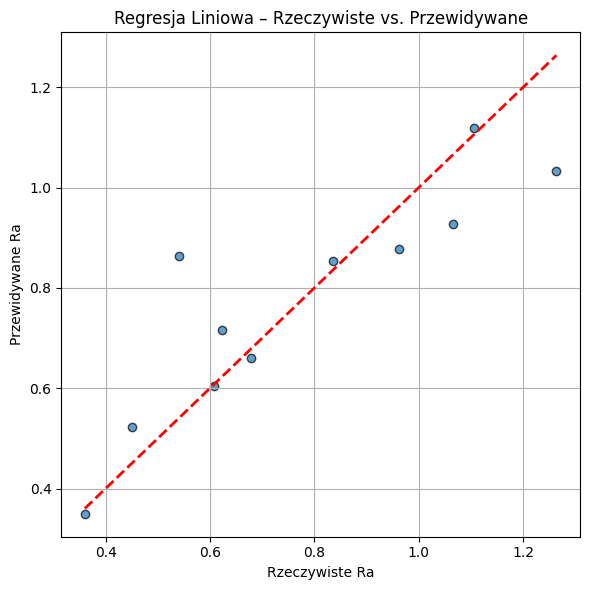


Wyniki dla: Random Forest
R² Score: 0.6372388901997088
MAE: 0.12492992424242405
MSE: 0.02849447544463376


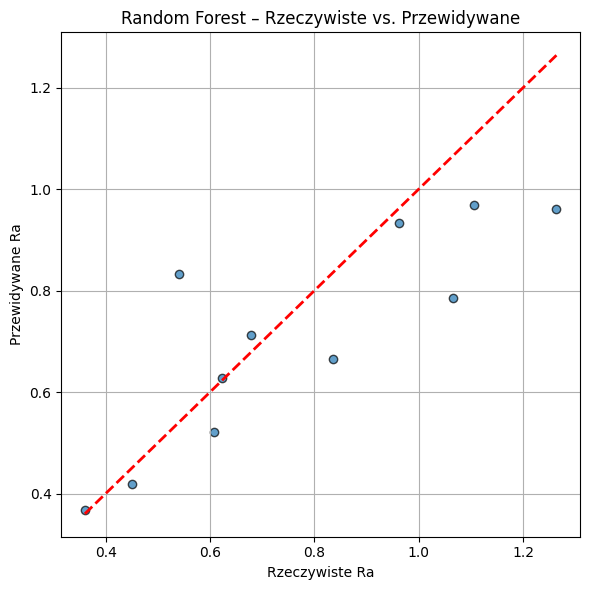

In [32]:
evaluate_model("Regresja Liniowa", y_test, y_pred_lin)
evaluate_model("Random Forest", y_test, y_pred_rf)